Saving citrus.csv to citrus (6).csv
     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')
Melhores resultados para k=13:
Matriz de Confusão:
[[914  74]
 [ 68 944]]
Acurácia: 0.929


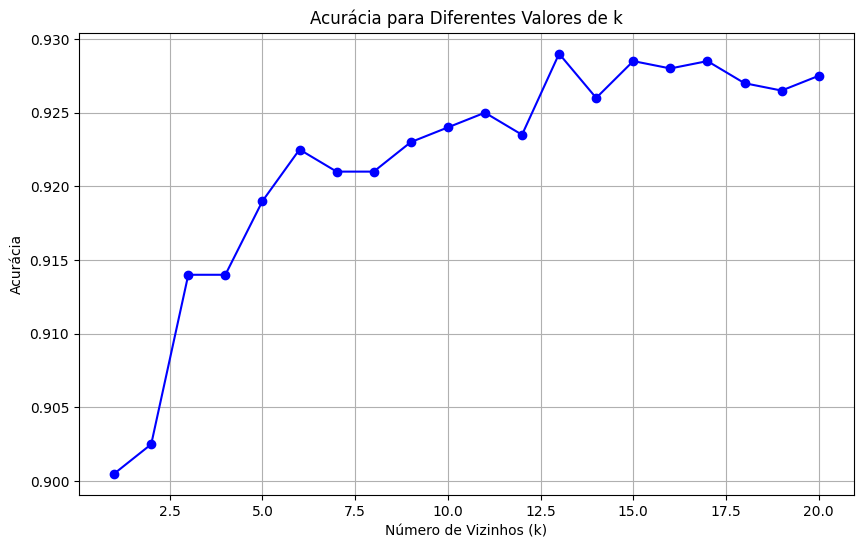

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Carregar arquivo do PC, foi utilizado o dataset mostrado no link do dever ED 08 - Oranges vs. Grapefruit
uploaded = files.upload()

# Obter o nome do arquivo carregado
nome_arquivo_local = list(uploaded.keys())[0]

# Carregar o dataset do arquivo local
data = pd.read_csv(nome_arquivo_local)

# Verificar as primeiras linhas do DataFrame para entender a estrutura do conjunto de dados
print(data.head())

# Verificar as colunas presentes no DataFrame
print(data.columns)

# Se a coluna 'name' não for encontrada, imprima todo o DataFrame
if 'name' not in data.columns:
    print("A coluna name não foi encontrada no conjunto de dados.")

else:
    # Separar as features (X) e os rótulos (y)
    X = data.drop('name', axis=1)
    y = data['name']

    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Função para calcular a matriz de confusão e a acurácia para um determinado valor de k
    def avaliar_knn(k):
        # Inicializar o classificador k-NN
        knn = KNeighborsClassifier(n_neighbors=k)

        # Treinar o modelo
        knn.fit(X_train, y_train)

        # Fazer previsões no conjunto de teste
        y_pred = knn.predict(X_test)

        # Calcular a matriz de confusão
        matriz_confusao = confusion_matrix(y_test, y_pred)

        # Calcular a acurácia
        acuracia = accuracy_score(y_test, y_pred)

        return matriz_confusao, acuracia

    # Testar diferentes valores de k
    valores_k = range(1, 21)  # Vamos testar k de 1 a 20
    resultados = []

    for k in valores_k:
        matriz_confusao, acuracia = avaliar_knn(k)
        resultados.append({'k': k, 'matriz_confusao': matriz_confusao, 'acuracia': acuracia})

    # Identificar os melhores valores de k com base na acurácia
    melhores_resultados = max(resultados, key=lambda x: x['acuracia'])

    # Imprimir os resultados para os melhores valores de k
    print(f"Melhores resultados para k={melhores_resultados['k']}:")
    print("Matriz de Confusão:")
    print(melhores_resultados['matriz_confusao'])
    print("Acurácia:", melhores_resultados['acuracia'])

    # Visualizar a acurácia para diferentes valores de k
    acuracias = [resultado['acuracia'] for resultado in resultados]

    plt.figure(figsize=(10, 6))
    plt.plot(valores_k, acuracias, marker='o', linestyle='-', color='b')
    plt.title('Acurácia para Diferentes Valores de k')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('Acurácia')
    plt.grid(True)
    plt.show()
